# Quiz2: Draw this figure with a perceptron:
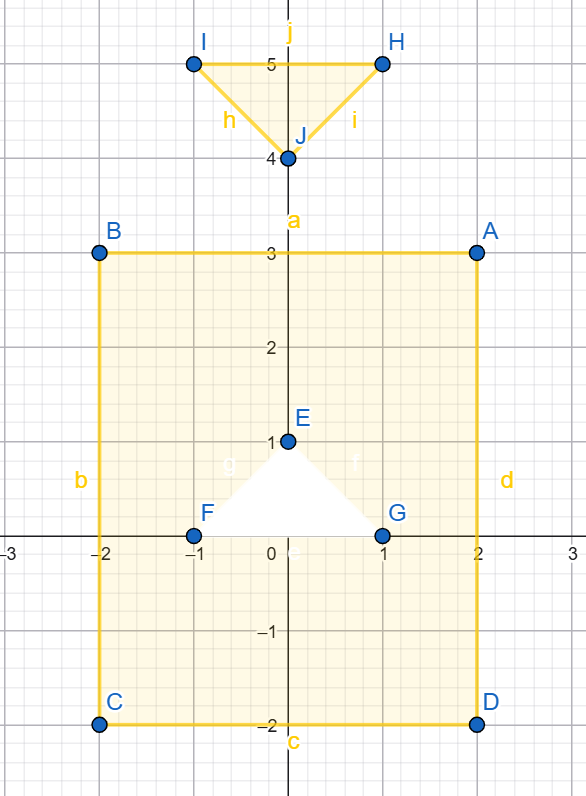

Note: The inside triangle should not be filled, the rest of the shapes are filled with yellow.

*Make this with 1 function calling (aka 1 drawing the entire shape).

You have full freedom of choosing the points as long as you produce a similar shape; square/rectangle with a triangle inside and inverted traingle outside with the areas being filled as shown.

# Solution:

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Draw a line from points and Adjusting weights based on the area needed (Above/Below)

In [5]:
def line_from_points(p1, p2):
    """Return slope (m) and intercept (b) of a line passing through two points."""
    if p1[0] == p2[0]:
        # Vertical line: slope undefined
        return None, p1[0]
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]
    return m, b


def line_equation_form(p1, p2, above=True):
    """Return line coefficients (A, B, C) for the form A*x + B*y + C = 0."""
    m, b = line_from_points(p1, p2)
    if m is None:
        # Vertical line: x = b form
        return [1, 0, -b] if above else [-1, 0, b]

    # Choose orientation (above vs below)
    if above:
        A, B, C = -m, 1, -b
    else:
        A, B, C = m, -1, b
    return [A, B, C]

### The Actual Quiz (Preceptron design)

In [6]:
def step(x):
    return 1 if x >= 0 else 0


def neuron(x, w, b):
    """Compute neuron output using step activation."""
    return step(np.dot(x, w) + b)


def perceptron(x):
    """Combine multiple neurons to define a diamond shape region."""

    # To draw the rectangle's segments:
    L1 = line_equation_form((2, 3), (-2, 3), above=False)
    L2 = line_equation_form((-2, 3), (-2, -2), above=True)
    L3 = line_equation_form((-2, -2), (2, -2), above=True)
    L4 = line_equation_form((2, -2), (2, 3), above=False)
    n1 = neuron(x, L1[:2], L1[2])
    n2 = neuron(x, L2[:2], L2[2])
    n3 = neuron(x, L3[:2], L3[2])
    n4 = neuron(x, L4[:2], L4[2])

    # The rectangle itself: (And Gate)
    n5 = neuron(np.array([n1, n2, n3, n4]), np.array([1, 1, 1, 1]), -4)

    # To draw the triangle's segments:
    L5 = line_equation_form((0, 1), (1, 0), above=False)
    L6 = line_equation_form((1, -0), (-1, 0), above=True)
    L7 = line_equation_form((-1, -0), (0, 1), above=False)
    n6 = neuron(x, L5[:2], L5[2])
    n7 = neuron(x, L6[:2], L6[2])
    n8 = neuron(x, L7[:2], L7[2])

    # The triangle itself: (And Gate)
    n9 = neuron(np.array([n6, n7, n8]), np.array([1, 1, 1]), -3)

    # The rectangle minus the triangle: (Nand Gate)
    n10 = neuron(np.array([n5, n9]), np.array([1, -1]), -1)

    # To draw the inverted Triangle's segments:
    L8 = line_equation_form((0, 4), (1, 5), above=True)
    L9 = line_equation_form((1, 5), (-1, 5), above=False)
    L10 = line_equation_form((-1, 5), (0, 4), above=True)
    n11 = neuron(x, L8[:2], L8[2])
    n12 = neuron(x, L9[:2], L9[2])
    n13 = neuron(x, L10[:2], L10[2])

    # The inverted triangle itself: (And Gate)
    n14 = neuron(np.array([n11, n12, n13]), np.array([1, 1, 1]), -3)

    # Combine rectangle-minus-triangle with inverted triangle: (Or Gate)
    n15 = neuron(np.array([n10, n14]), np.array([1, 1]), -1)
    return n15

### The drawing code (Minor Changes):

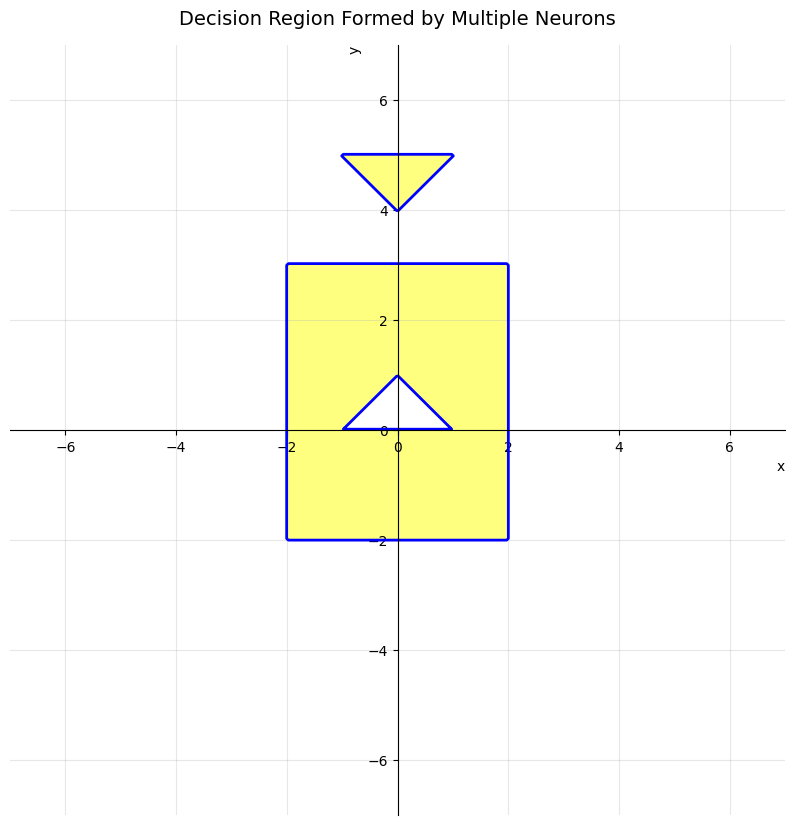

In [7]:
def visualize_perceptron(
    perceptron,
    limit=7,
    resolution=480,
    title="Decision Region Formed by Multiple Neurons",
    highlight="both",
):
    # Create a mesh grid
    x = np.linspace(-limit, limit, resolution)
    y = np.linspace(-limit, limit, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.array(
        [
            [perceptron((xx, yy)) for xx, yy in zip(row_x, row_y)]
            for row_x, row_y in zip(X, Y)
        ]
    )

    # Plot setup
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=14, pad=15)

    # Plot decision boundary line
    plt.contour(X, Y, Z, levels=[0], colors=["blue"], linewidths=2)

    # Conditionally fill regions
    if highlight in ("both", "1"):
        plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=["yellow"], alpha=0.5)
    if highlight in ("both", "0"):
        plt.contourf(X, Y, Z, levels=[-0.5, 0.5], colors=["red"], alpha=0.5)

    # Labeling & axes
    plt.xlabel("x", loc="right")
    plt.ylabel("y", loc="top")
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.grid(alpha=0.3)

    # Center axes visually
    ax = plt.gca()
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    plt.show()


visualize_perceptron(perceptron, highlight="1")